In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import Utils

1. Loading the images from the hardrive

In [ ]:
xs =[]
ys=[]
dic={'Fish': 0, 'Lasagne': 1,'Pizza': 2,'Salad': 3}
for p in ['./data/Fish', './data/Lasagne', './data/Pizza', './data/Salad', ]:
    for f in os.listdir(p):
        print(os.listdir(p))
        try:
            xs.append(imresize(immpimg.imread(os.path.join(p, f))))
            ys.append(dic[p[7:]])
        except:
            continue

['Fish0.jpg', 'Fish1.jpg', 'Fish2.jpg', 'Fish3.jpg', 'Fish4.jpg', 'Fish5.jpg', 'Fish6.jpg', 'Fish7.jpg', 'Fish8.jpg', 'Fish9.jpg', 'Fish10.jpg', 'Fish11.jpg', 'Fish12.jpg', 'Fish13.jpg', 'Fish14.jpg', 'Fish15.jpg', 'Fish16.jpg', 'Fish17.jpg', 'Fish18.jpg', 'Fish19.jpg', 'Fish20.jpg', 'Fish21.jpg', 'Fish22.jpg', 'Fish23.jpg', 'Fish24.jpg', 'Fish25.jpg', 'Fish26.jpg', 'Fish27.jpg', 'Fish28.jpg', 'Fish29.jpg', 'Fish30.jpg', 'Fish31.jpg', 'Fish32.jpg', 'Fish33.jpg', 'Fish34.jpg', 'Fish35.jpg', 'Fish36.jpg', 'Fish37.jpg', 'Fish38.jpg', 'Fish39.jpg', 'Fish40.jpg', 'Fish41.jpg', 'Fish42.jpg', 'Fish43.jpg', 'Fish44.jpg', 'Fish45.jpg', 'Fish46.jpg', 'Fish47.jpg', 'Fish48.jpg', 'Fish49.jpg', 'Fish50.jpg', 'Fish51.jpg', 'Fish52.jpg', 'Fish53.jpg', 'Fish54.jpg', 'Fish55.jpg', 'Fish56.jpg', 'Fish57.jpg', 'Fish58.jpg', 'Fish59.jpg', 'Fish60.jpg', 'Fish61.jpg', 'Fish62.jpg', 'Fish63.jpg', 'Fish64.jpg', 'Fish65.jpg', 'Fish66.jpg', 'Fish67.jpg', 'Fish68.jpg', 'Fish69.jpg', 'Fish70.jpg', 'Fish71.jpg', '

Randomize the dataset:

In [3]:
n_indexes = len(xs)
indexes = np.random.permutation(range(n_indexes))
xs = [xs[index] for index in indexes]
ys = [ys[index] for index in indexes]

(1990,)
3


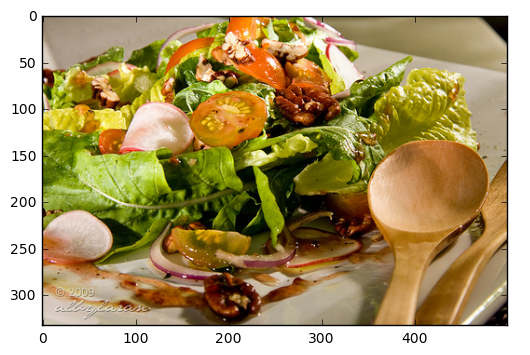

In [4]:
xs =np.asarray(xs)
print(xs.shape)
#Test if dataset was mixed:

print(ys[213])
plt.imshow(xs[213])

3. Encode the data with one hot encode

(1990, 4)


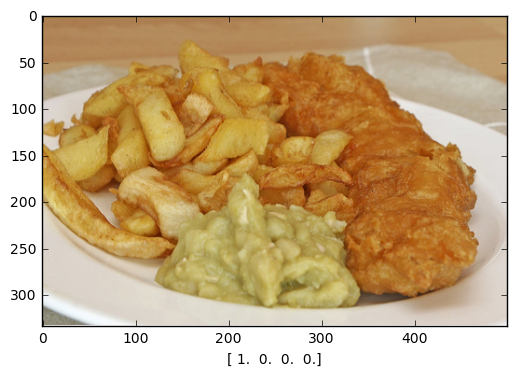

In [5]:
n_values =4
encode = np.eye(n_values)
y_one_hot = np.zeros((1990,4))
for i in range (len(ys)):
    y_one_hot[i,]= encode[ys[i]]
    
print(y_one_hot.shape)
plt.imshow(xs[5])
plt.xlabel(y_one_hot[5])

We only want to add class name excluding path:

In [6]:
for p in ['./data/Fish', './data/Lasagne', './data/Pizza', './data/Salad', ]:
    print (p[7:])

Fish
Lasagne
Pizza
Salad


In [7]:
print(len(xs))
print(len(ys))

1990
1990


In [8]:
from scipy.misc import imresize
x_small = []
dimensions =(32, 32)
interpolation = "bicubic"

for image in xs:
    x_small.append( imresize(image, dimensions , interp = interpolation))

In [9]:
print(len(x_small))

1990


Try to display images from the datase to see if they are displayed correctly

C:\Users\tumosa\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


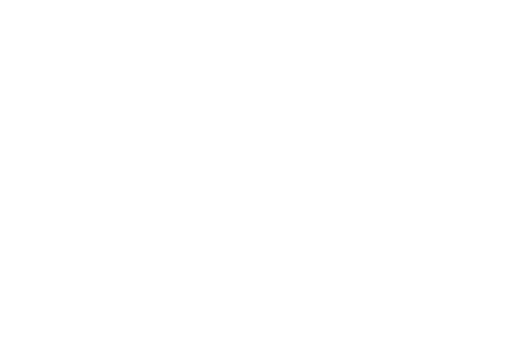

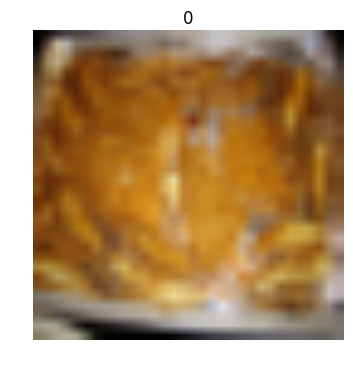

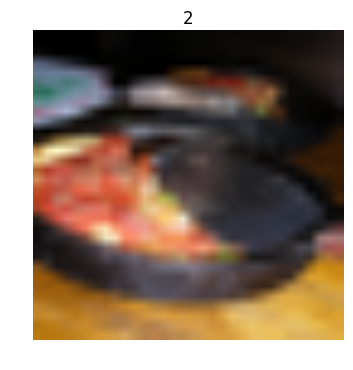

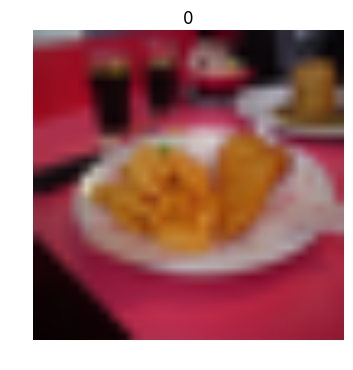

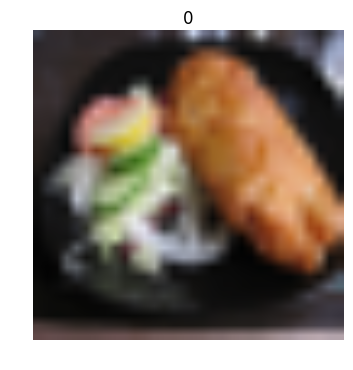

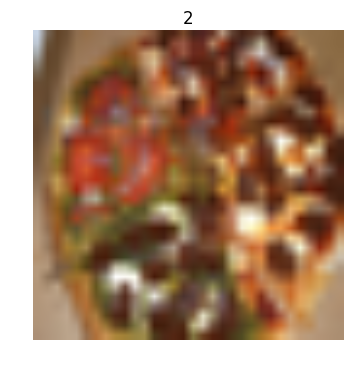

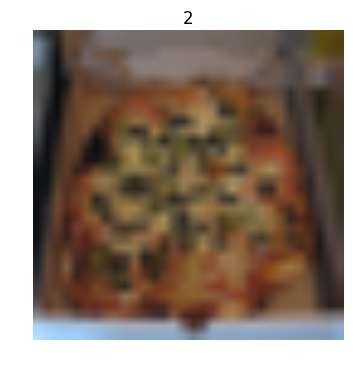

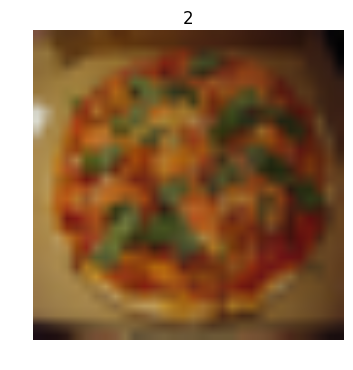

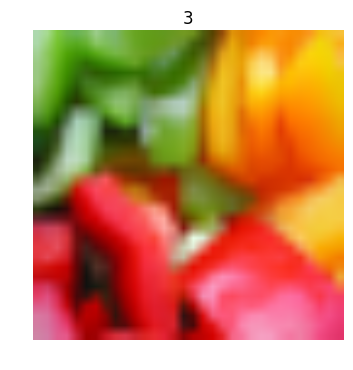

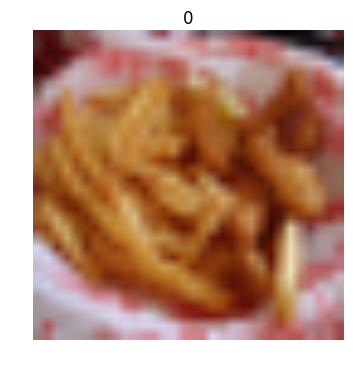

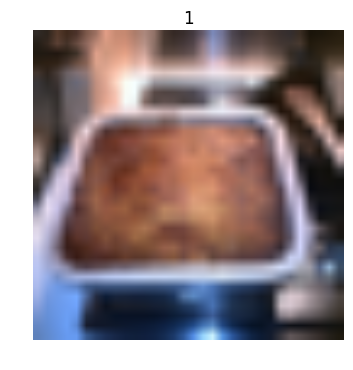

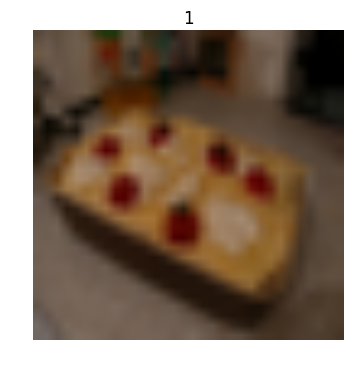

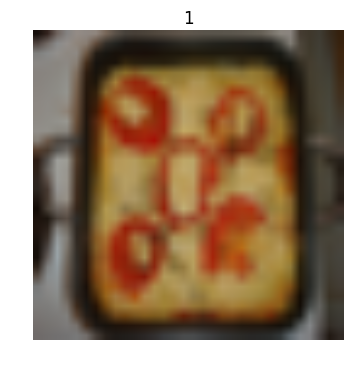

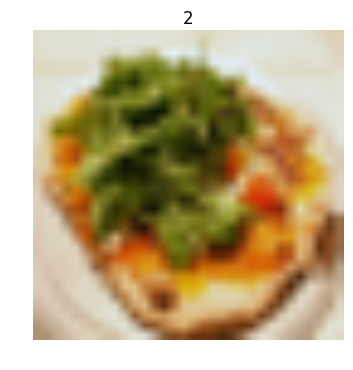

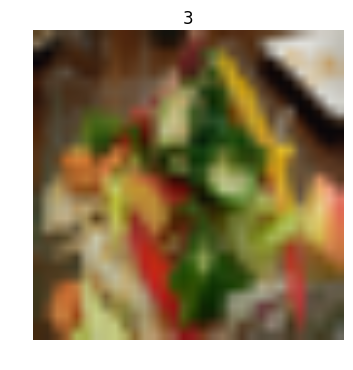

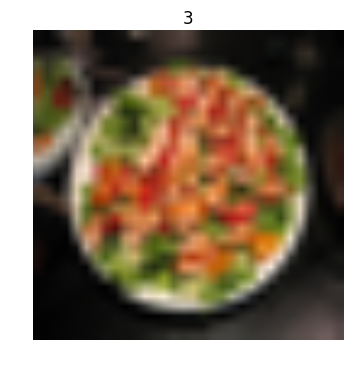

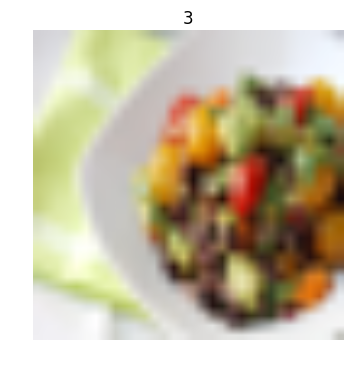

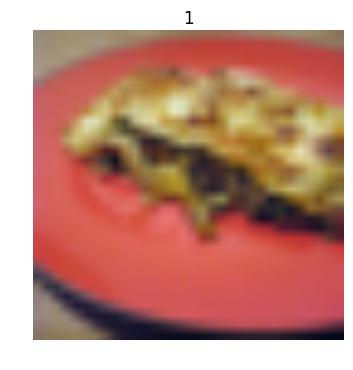

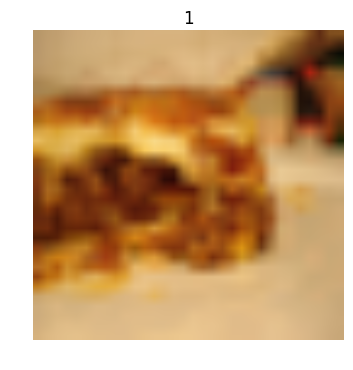

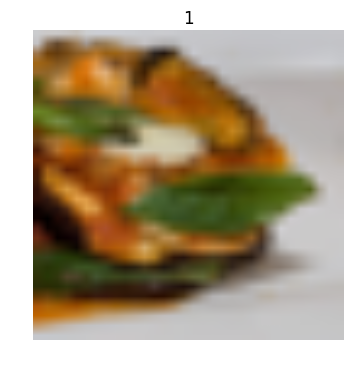

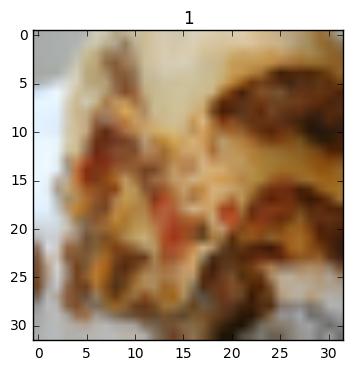

In [10]:
import random
for i in range(20):
    j = random.randint(0,len(x_small))
    plt.axis('off')
    fig, axes = plt.subplots()
    axes.set_title(ys[j])
    axes.imshow(x_small[j].astype(np.uint8))

In [11]:
from PIL import Image

In [12]:
x_grey=[]
for data in x_small:
    img = Image.fromarray(data, 'RGB').convert('L')
    x_grey.append(np.array(img))
    
print(x_grey[0].shape)

(32, 32)


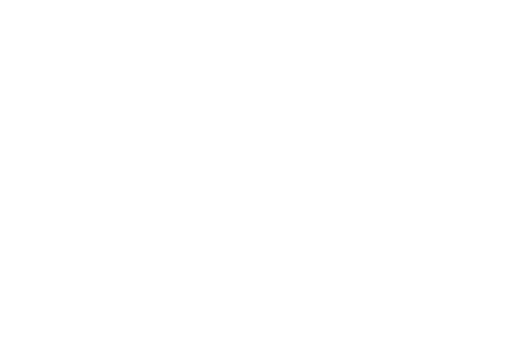

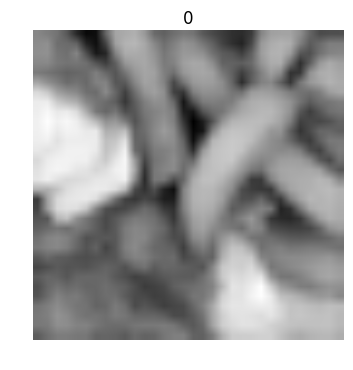

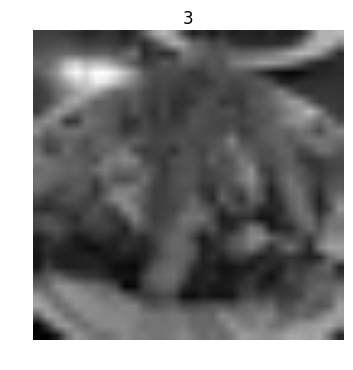

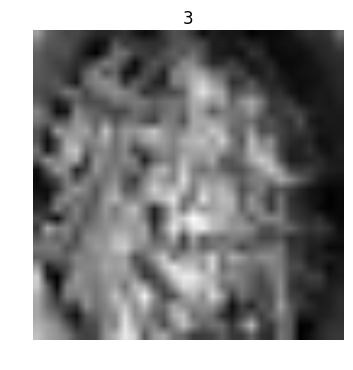

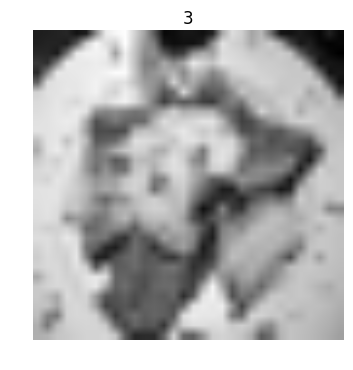

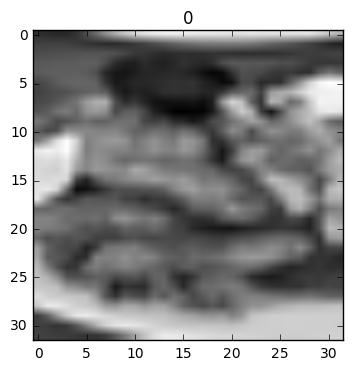

In [13]:
for i in range(5):
    j = random.randint(0,len(x_small))
    plt.axis('off')
    fig, axes = plt.subplots()
    axes.set_title(ys[j])
    axes.imshow(x_grey[j].astype(np.uint8), cmap='gray')

In [14]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
ys =np.asarray(ys)
print(ys.shape)
y =enc.fit_transform(ys.reshape(-1, 1))
print(y.shape)

(1990,)
(1990, 4)


In [15]:
y_batch=np.zeros((100,4))

y[0,:]=[1,1,1,1]
#print (y_batch[0,:])
print (y[0,:])

  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0


C:\Users\tumosa\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


In [16]:
def next_batch(n):
    indexes = np.random.permutation(range(n))
    x_batch= np.zeros((n, 32, 32))
    y_batch = np.zeros((n,4))
    x_batch = [x_grey[index] for index in indexes]
    y_batch = [y_one_hot[index] for index in indexes]

    return x_batch,y_batch

In [17]:
t1, t2 =next_batch(2)

In [25]:
print (t2[1])

[ 0.  0.  1.  0.]


In [30]:
#print(x_grey.shape)
x_grey.astype(np.float32)
print(y_one_hot.shape)

AttributeError: 'list' object has no attribute 'astype'

In [19]:
import tensorflow as tf

In [20]:
X = tf.placeholder(tf.float32, [None, 32, 32])
W = tf.Variable(tf.zeros([1024, 4]))
b = tf.Variable(tf.zeros([4]))

In [22]:
#model
XX = tf.reshape(X, [-1, 32*32])
Y = tf.nn.softmax(tf.matmul(XX, W) + b)
Y_ = tf.placeholder(tf.float32, [None, 4])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(Y_ * tf.log(Y), reduction_indices=[1]))
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [23]:
optimizer = tf.train.AdamOptimizer(0.007)
train_step = optimizer.minimize(cross_entropy)

In [24]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(10000):
    batch_X, batch_Y = next_batch(100)
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y})

In [ ]:
correct_prediction = tf.equal(tf.argmax(y_one_hot, 1), tf.argmax(Y_, 1))
#accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#print(sess.run(accuracy, feed_dict={X: batch_X, Y_: batch_Y}))